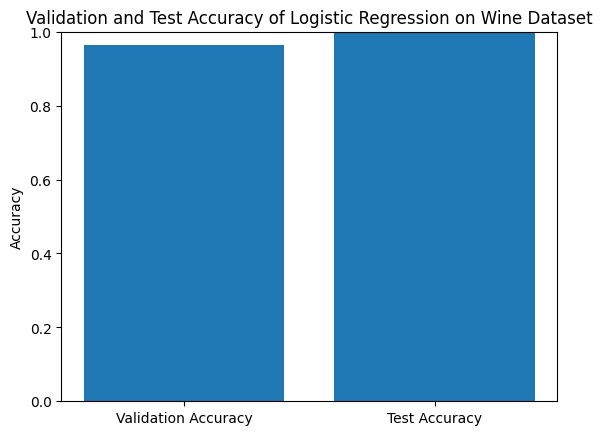

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.bar(['Validation Accuracy', 'Test Accuracy'], [val_acc, test_acc])
plt.title('Validation and Test Accuracy of Logistic Regression on Wine Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()
